In [1]:
%load_ext autoreload
%autoreload 2


### *Question 1*:

With this dataset we can define two image registration problems: T1 to T1 registration (e.g. register `3_2_t1_d.tif` to `3_2_t1.tif`) and T2 to T1 registration (e.g. register `3_2_t2.tif` to `3_2_t1.tif`). Which one of these can be considered inter-modal image registration and which one intra-modal image registration?

inter model is T1 and T2 since these 2 are different modalities in MRI imaging. T1 to T1 is intra modal image registration because the image is acquired by the same method.

### *Task 1*:

## B. Point-based registration


In [2]:
import sys
sys.path.append("../code")
import registration
import registration_project
import registration_tests
import registration_util as util
import cv2
import matplotlib.pyplot as plt

In [3]:
I_path = '../data/image_data/3_3_t1.tif'
Im_path = '../data/image_data/3_3_t1_d.tif'

X_t1_t1, Xm_t1_t1 = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X_t1_t1))
print('Xm:\n{}'.format(Xm_t1_t1))

I_path = '../data/image_data/3_3_t1.tif'
Im_path = '../data/image_data/3_3_t2.tif'

X_t1_t2, Xm_t1_t2 = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X_t1_t2))
print('Xm:\n{}'.format(Xm_t1_t2))



X:
[[118.3        157.9       ]
 [119.99548387 116.16322581]]
Xm:
[[126.54516129 161.03548387]
 [137.87935484 135.32451613]]
X:
[[120.85483871 155.34516129]
 [121.27290323 119.99548387]]
Xm:
[[122.71290323 157.20322581]
 [136.60193548 132.76967742]]


[[ 1.13457015e+00 -1.83302925e-01 -6.74082319e-04]]
[[ 9.98625339e-01 -1.23719483e-02  6.56207312e-04]]


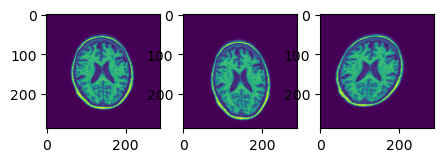

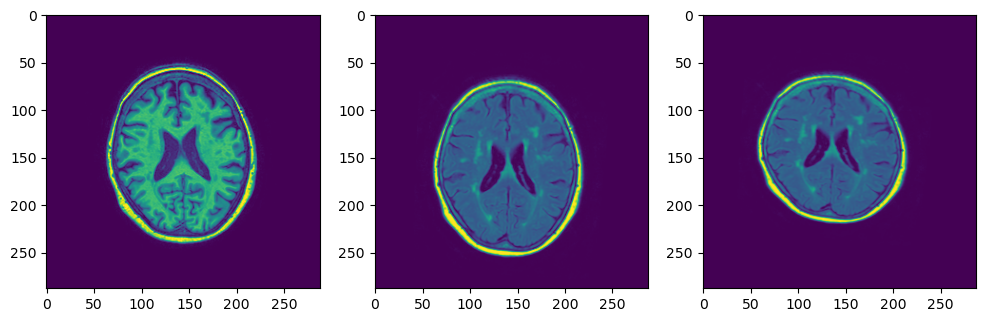

In [ ]:
Xh_t1_t1 = util.c2h(X_t1_t1)
Xhm_t1_t1 = util.c2h(Xm_t1_t1)
Xh_t1_t2 = util.c2h(X_t1_t2)
Xhm_t1_t2 = util.c2h(Xm_t1_t2)
    
T_t1_t1 = registration.ls_affine(Xh_t1_t1, Xhm_t1_t1)
T_t1_t2 = registration.ls_affine(Xh_t1_t2, Xhm_t1_t2)

I_path = '../data/image_data/3_3_t1.tif'
Im_path = '../data/image_data/3_3_t1_d.tif'
Im = plt.imread(Im_path)
I = plt.imread(I_path)

t_t1_t1 =  X_t1_t1 - Xm_t1_t1
Th_t1_t1 = util.t2h(T_t1_t1, t_t1_t1[0].T )
it_1 , xt_1= registration.image_transform(Im, Th_t1_t1)

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(131)
im11 = ax1.imshow(I)

ax2 = fig.add_subplot(132)
im21 = ax2.imshow(Im)

ax3 = fig.add_subplot(133)
im31 = ax3.imshow(it_1)

I_path = '../data/image_data/3_3_t1.tif'
Im_path = '../data/image_data/3_3_t2.tif'
Im = plt.imread(Im_path)
I = plt.imread(I_path)

t_t1_t2 =  X_t1_t2 - Xm_t1_t2
Th_t1_t2 = util.t2h(T_t1_t2, t_t1_t2[0].T)
it_2, xt_2 = registration.image_transform(Im, Th_t1_t2)

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(131)
im11 = ax1.imshow(I)

ax2 = fig.add_subplot(132)
im21 = ax2.imshow(Im)

ax3 = fig.add_subplot(133)
im31 = ax3.imshow(it_2)



### *Question 2*:
Describe how you would estimate the registration error. (Hint: Should you use the same points that you used for computing the affine transformation to also compute the registration error?) How does the number of corresponding point pairs affect the registration error? Motivate all your answers.

I would estimate the registration error by first computing the registration, putting the fiducial points on important regions that have good overlap between the 2 images. Then, once the optimization of the registration is done, we can look at the registration error. Compute the target registration error as the average distance between the points in the fixed image and the transformed moving points

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*:

By changing the similarity function and the initial parameter vector, you can also use this script to perform affine registration and use mutual information as a similarity measure. Do not forget to also change the transformation for the visualization of the results.

Using the provided dataset and the functions that you have implemented in the exercises, perform the following series of experiments:

1. Rigid intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
2. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
3. Affine intensity-based registration of a T1 and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using normalized cross-correlation as a similarity measure.
4. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using mutual information as a similarity measure.
5. Affine intensity-based registration of a T1 slice and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using mutual information as a similarity measure.

Describe, analyze and compare the results from each experiment. If a method fails, describe why you think it fails. Note that you will most likely have to try different values for the learning rate in each experiment in order to find the one that works best. 

In [5]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_project import intensity_based_registration
import matplotlib.pyplot as plt 


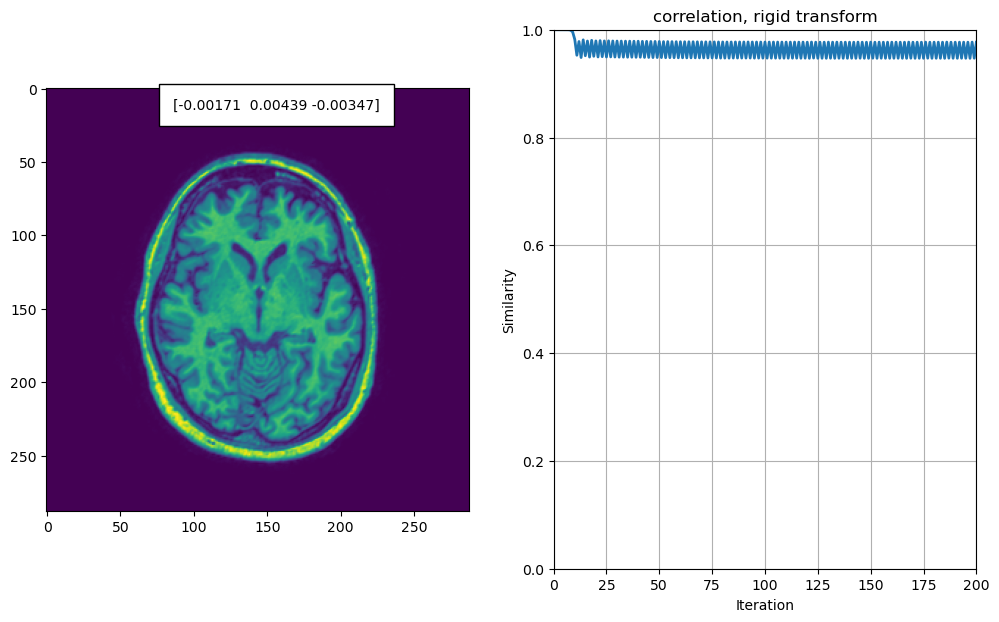

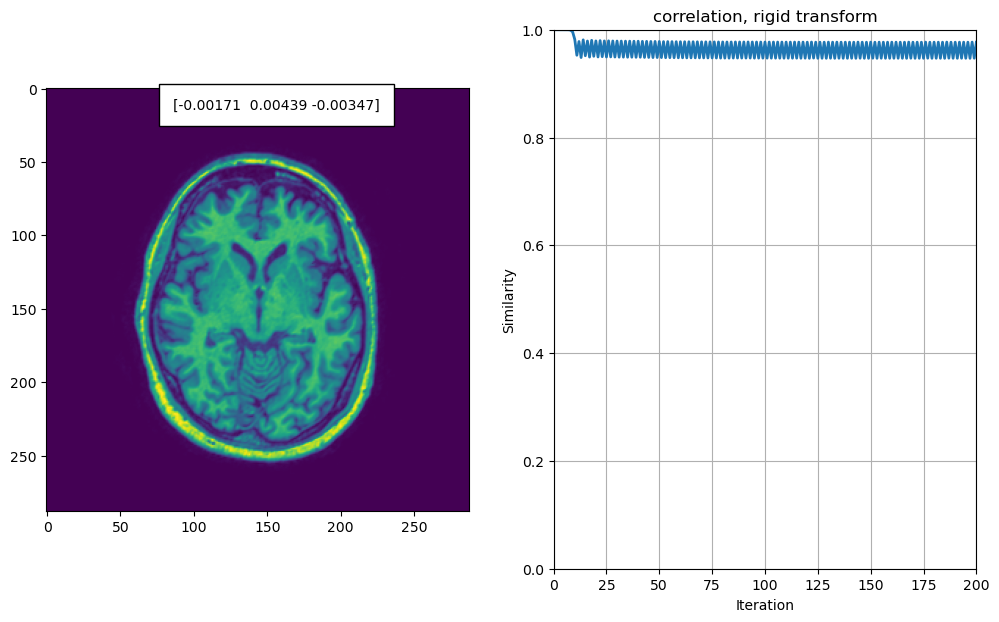

In [6]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')
im_output_rigid_ncc_1 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = True, rigid = True)

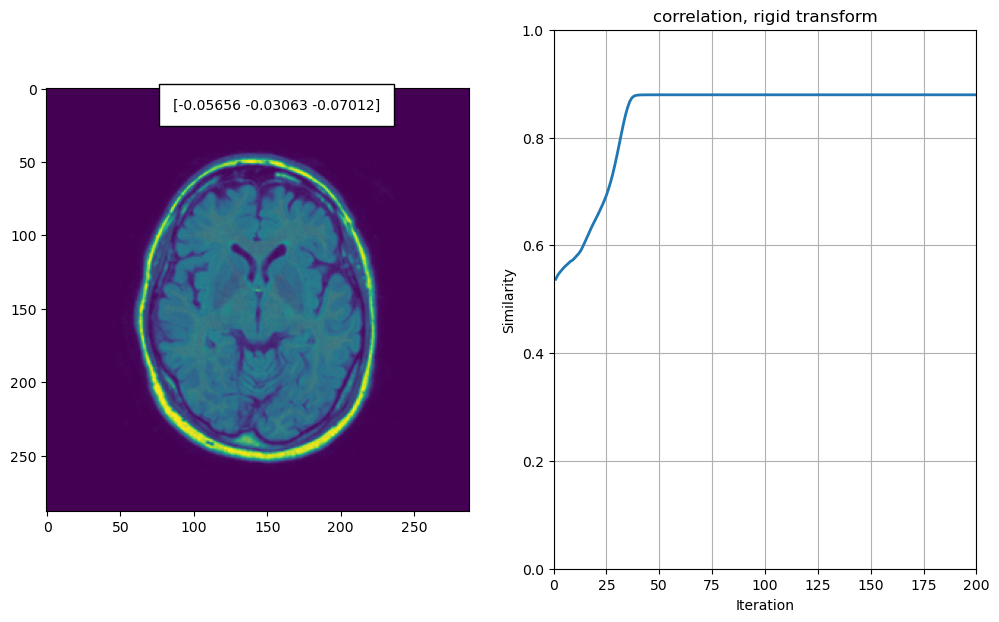

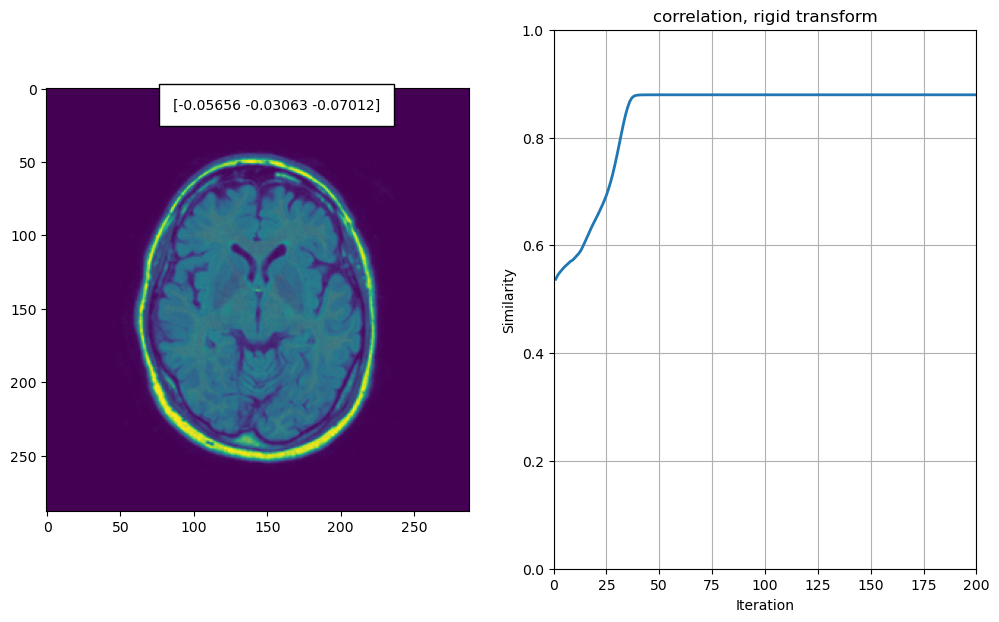

In [7]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t2.tif')
im_output_rigid_ncc_2 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = True, rigid = True)

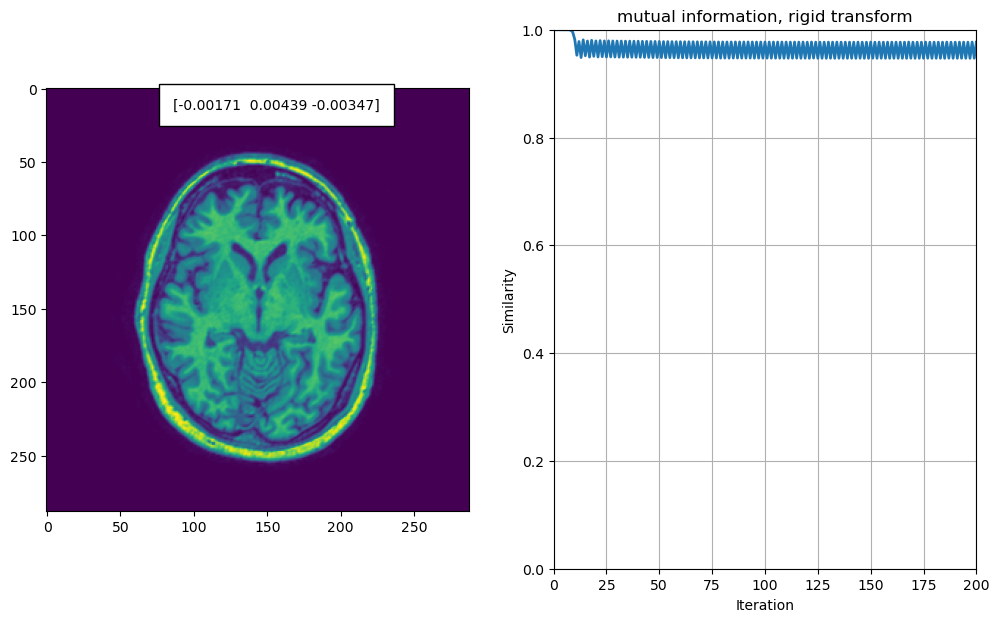

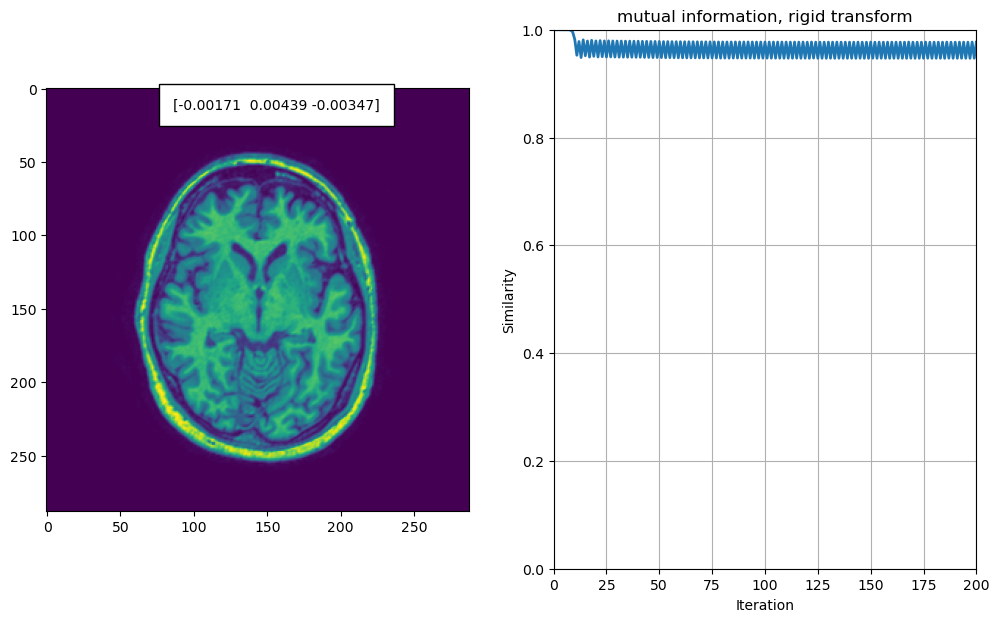

In [8]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')
im_output_rigid_MI_1 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = False, rigid = True)

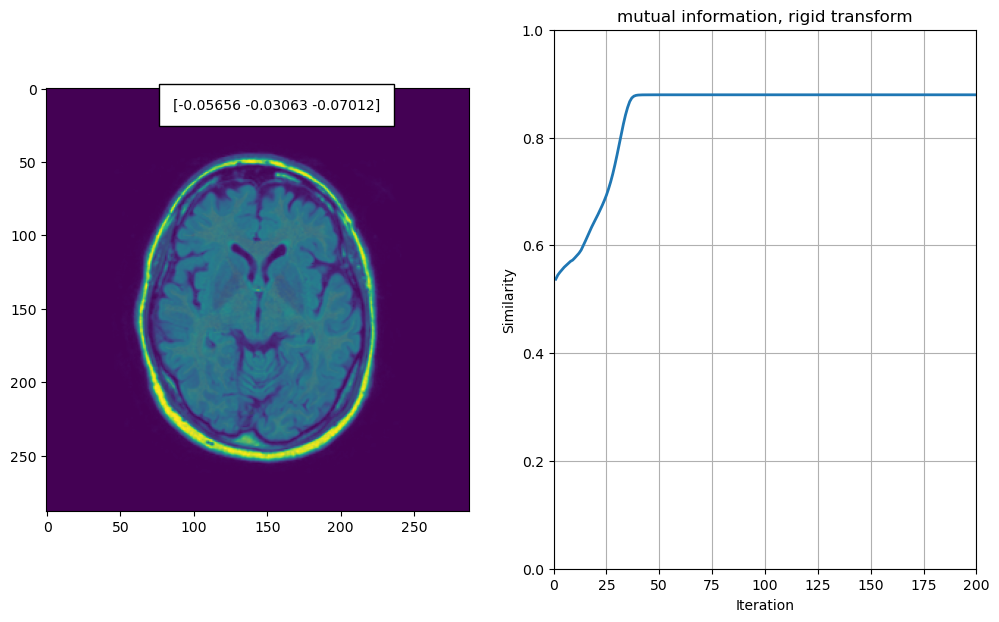

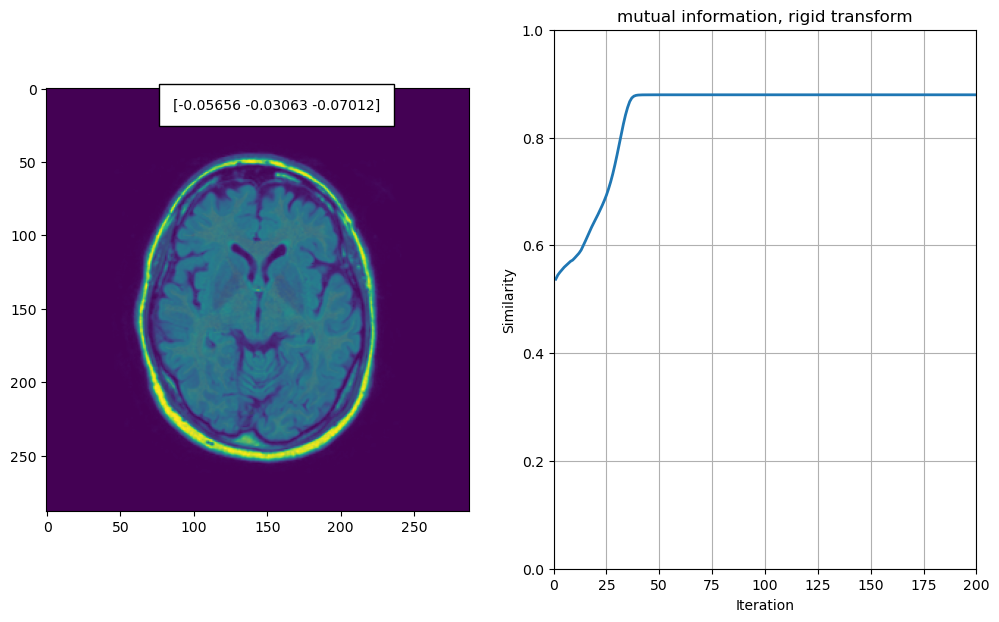

In [9]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t2.tif')
im_output_rigid_MI_2 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = False, rigid = True)

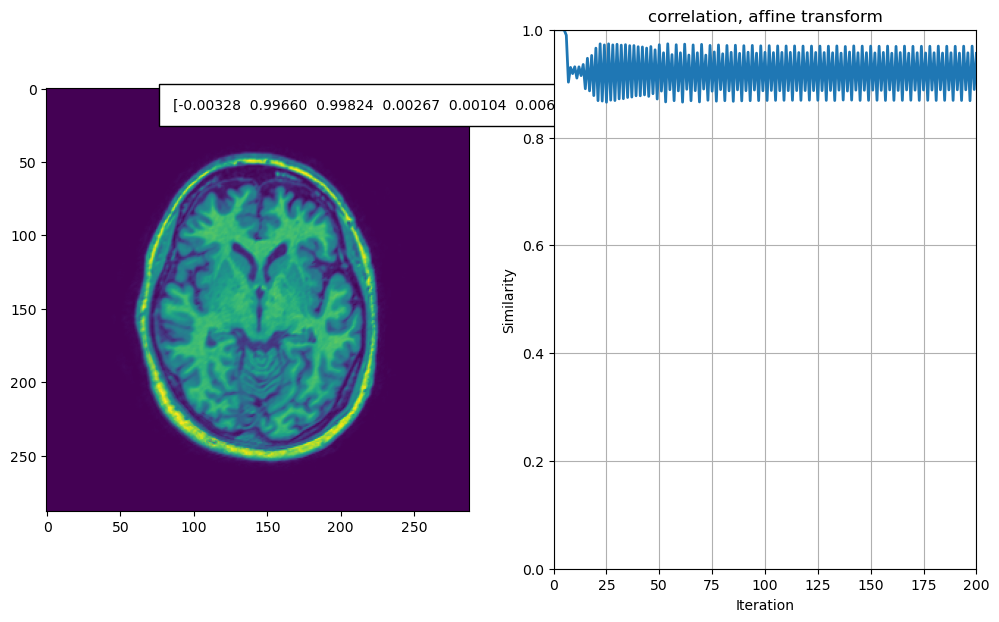

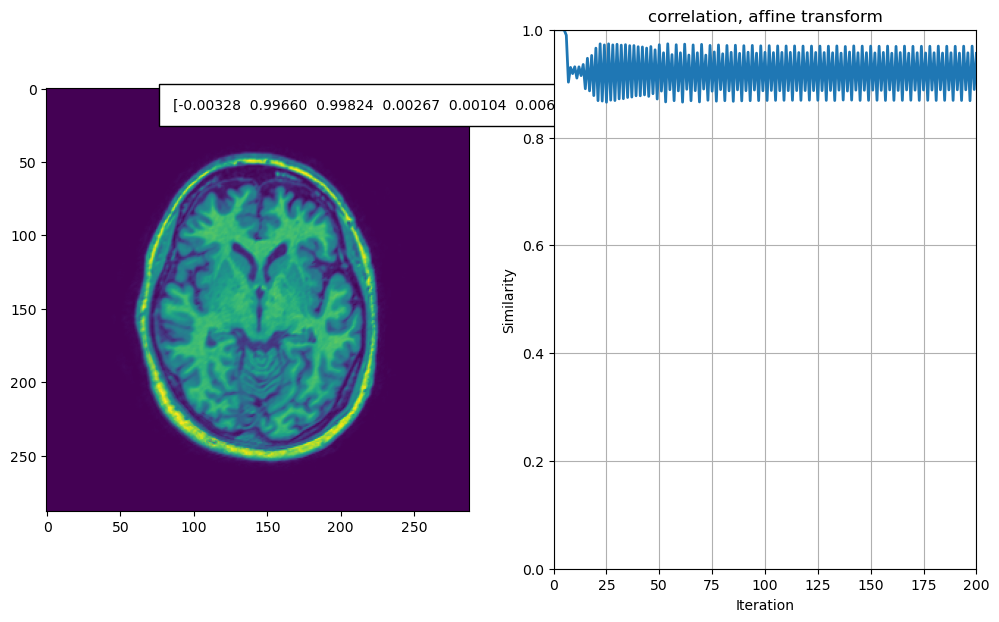

In [10]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')
im_output_affine_ncc_1 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = True, rigid = False)

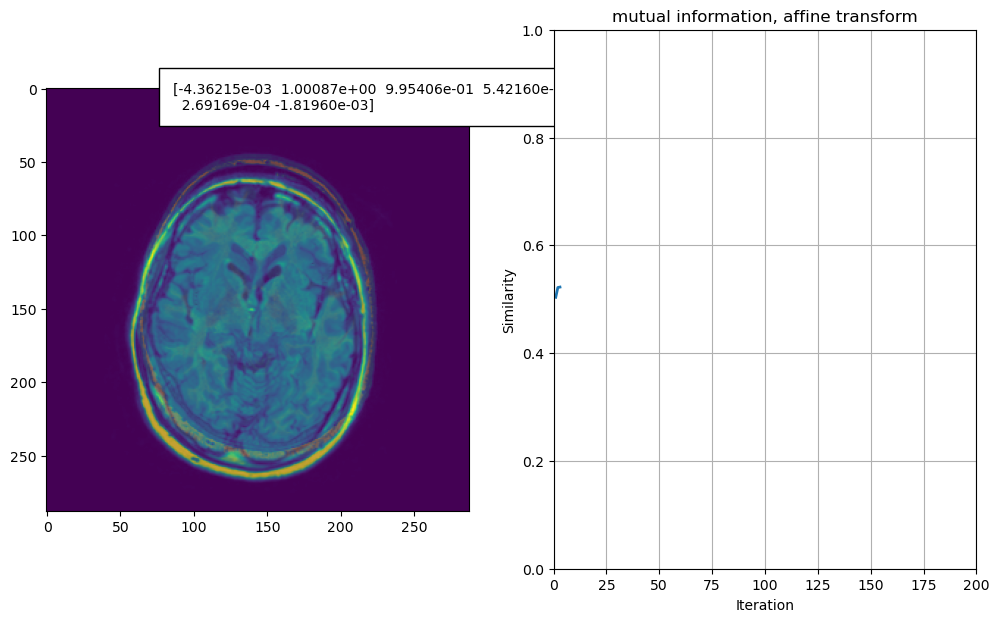

In [11]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t2.tif')
im_output_affine_MI_2 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = False, rigid = False)

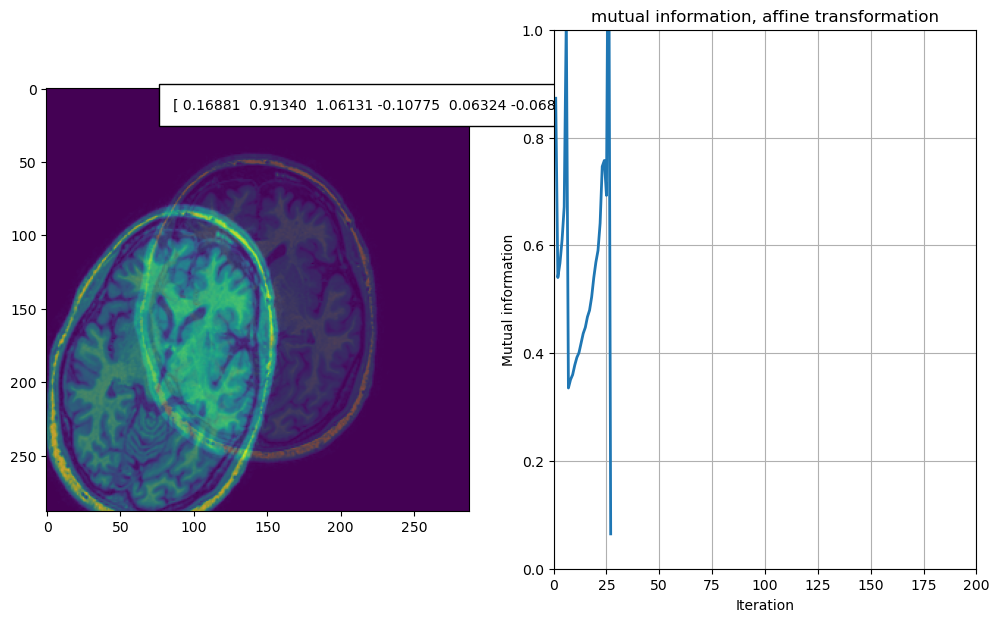

KeyboardInterrupt: 

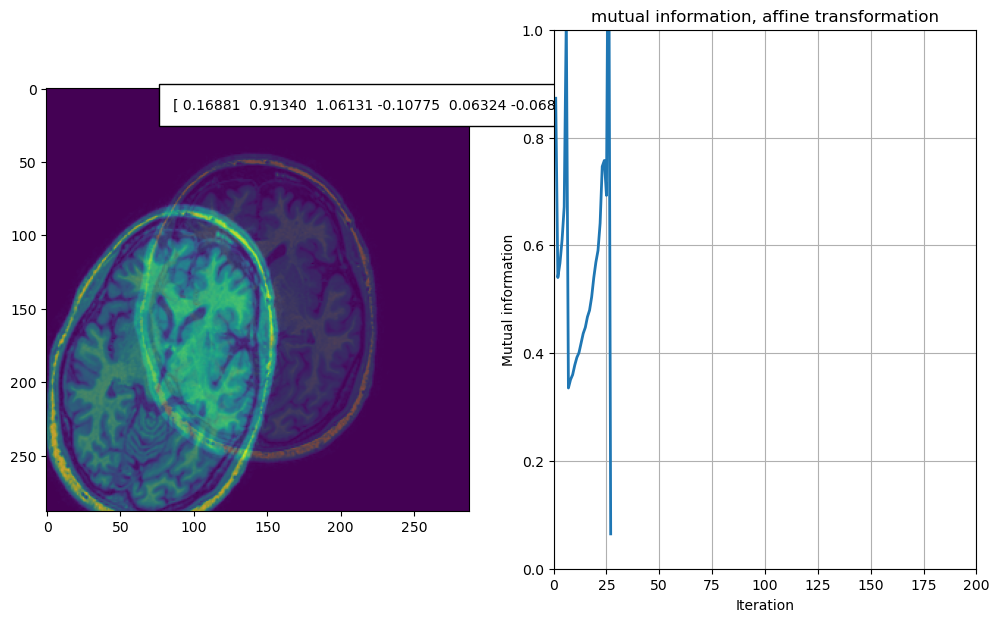

In [ ]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')
im_output_affine_MI_1 = intensity_based_registration(I, Im, adaptive_learning = False, ncc = False, rigid = False)

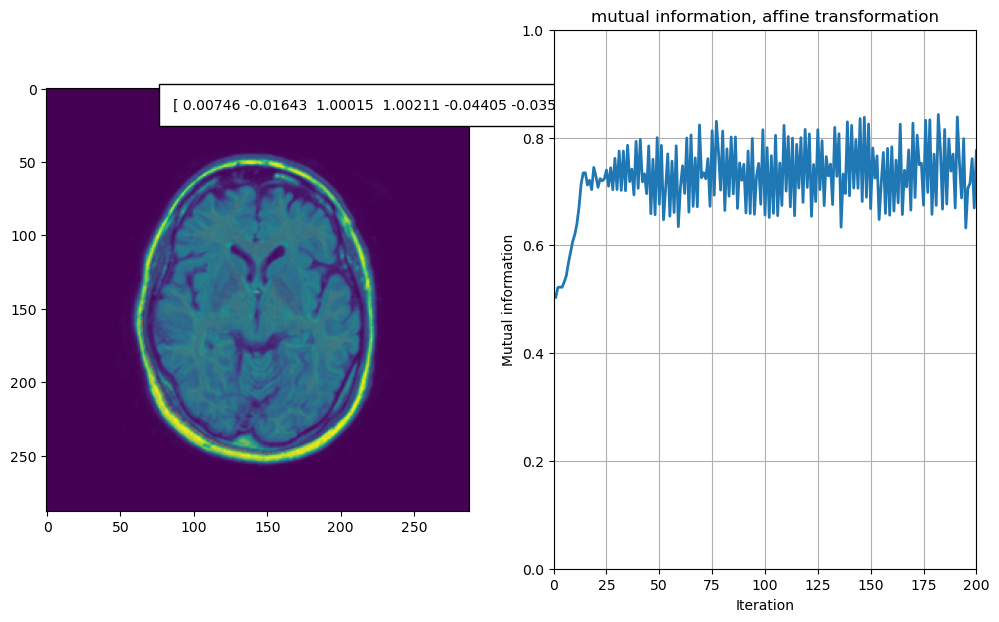

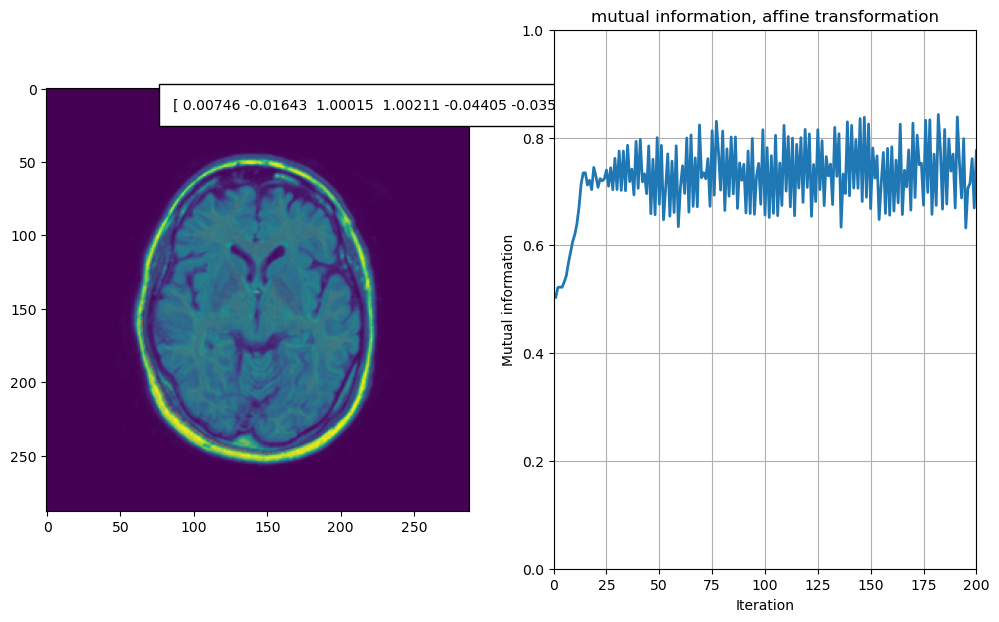

In [ ]:
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t2.tif')
im_output_affine_MI_2 =  intensity_based_registration(I, Im, adaptive_learning = False, ncc = False, rigid = False)